```
Muris Saab
ADS509 - Assignment 3.1
Muris Saab
```

# ADS 509 Module 3: Group Comparison 

The task of comparing two groups of text is fundamental to textual analysis. There are innumerable applications: survey respondents from different segments of customers, speeches by different political parties, words used in Tweets by different constituencies, etc. In this assignment you will build code to effect comparisons between groups of text data, using the ideas learned in reading and lecture.

This assignment asks you to analyze the lyrics for the two artists you selected in Module 1 and the Twitter descriptions pulled for Robyn and Cher. If the results from that pull were not to your liking, you are welcome to use the zipped data from the “Assignment Materials” section. Specifically, you are asked to do the following: 

* Read in the data, normalize the text, and tokenize it. When you tokenize your Twitter descriptions, keep hashtags and emojis in your token set. 
* Calculate descriptive statistics on the two sets of lyrics and compare the results. 
* For each of the four corpora, find the words that are unique to that corpus. 
* Build word clouds for all four corpora. 

Each one of the analyses has a section dedicated to it below. Before beginning the analysis there is a section for you to read in the data and do your cleaning (tokenization and normalization). 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
import os
import re
import emoji
import pandas as pd

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation
from wordcloud import WordCloud 

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer


In [2]:
import re
import emoji
from collections import Counter
from nltk.corpus import stopwords

# Some punctuation variations
punctuation = set("!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~")  # Punctuation characters
tw_punct = punctuation - {"#"}  # Allow hashtags

# Stopwords
sw = stopwords.words("english")

# Two useful regex patterns
whitespace_pattern = re.compile(r"\s+")
hashtag_pattern = re.compile(r"^#[0-9a-zA-Z]+")

# Set of emojis (combining all available emojis from the emoji module)
all_language_emojis = set()
for country in emoji.EMOJI_DATA:
    for em in emoji.EMOJI_DATA[country]:
        all_language_emojis.add(em)

# Functions

def descriptive_stats(tokens, num_tokens=5, verbose=True):
    """
    Given a list of tokens, print number of tokens, number of unique tokens, 
    number of characters, lexical diversity, and num_tokens most common tokens.
    Return a dictionary with these stats.
    """
    # Number of tokens
    num_total_tokens = len(tokens)
    
    # Number of unique tokens
    unique_tokens = set(tokens)
    num_unique_tokens = len(unique_tokens)
    
    # Total number of characters (in tokens)
    num_characters = sum(len(token) for token in tokens)
    
    # Lexical diversity: ratio of unique tokens to total tokens
    lexical_diversity = num_unique_tokens / num_total_tokens if num_total_tokens > 0 else 0
    
    # Most common tokens
    token_counts = Counter(tokens)
    most_common_tokens = token_counts.most_common(num_tokens)
    
    stats = {
        "Total tokens": num_total_tokens,
        "Unique tokens": num_unique_tokens,
        "Total characters": num_characters,
        "Lexical diversity": lexical_diversity,
        "Most common tokens": most_common_tokens
    }
    
    if verbose:
        for key, value in stats.items():
            print(f"{key}: {value}")
    
    return stats


def contains_emoji(s):
    """
    Check if the string contains any emojis.
    """
    s = str(s)
    emojis = [ch for ch in s if emoji.is_emoji(ch)]
    return len(emojis) > 0


def remove_stop(tokens):
    """
    Remove stopwords from the list of tokens.
    """
    return [token for token in tokens if token.lower() not in sw]


def remove_punctuation(text, punct_set=tw_punct):
    """
    Remove punctuation from text.
    """
    return "".join([ch for ch in text if ch not in punct_set])


def tokenize(text):
    """
    Splits text into tokens based on whitespace.
    """
    return whitespace_pattern.split(text)


def prepare(text, pipeline):
    """
    Applies a series of transformations to the input text.
    The pipeline is a list of functions to apply in order.
    """
    tokens = str(text)
    
    for transform in pipeline:
        tokens = transform(tokens)
        
    return tokens


# Example usage:

# Sample text
text = "Hello world! 😊 This is an example tweet with a hashtag #Python and some emojis 😊😊."

# Pipeline of transformations
pipeline = [remove_punctuation, tokenize, remove_stop]

# Prepare the text (apply the transformations)
tokens = prepare(text, pipeline)

# Show descriptive statistics
stats = descriptive_stats(tokens, num_tokens=5, verbose=True)

# Check for emojis
has_emoji = contains_emoji(text)
print(f"Contains emoji: {has_emoji}")

# Output the tokens after processing
print(f"Processed tokens: {tokens}")


Total tokens: 9
Unique tokens: 9
Total characters: 45
Lexical diversity: 1.0
Most common tokens: [('Hello', 1), ('world', 1), ('😊', 1), ('example', 1), ('tweet', 1)]
Contains emoji: True
Processed tokens: ['Hello', 'world', '😊', 'example', 'tweet', 'hashtag', '#Python', 'emojis', '😊😊']


## Data Ingestion

Use this section to ingest your data into the data structures you plan to use. Typically this will be a dictionary or a pandas DataFrame.

In [8]:
# Feel fre to use the below cells as an example or read in the data in a way you prefer

data_location = "" # change to your location if it is not in the same directory as your notebook
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

artist_files = {'cher':'cher_followers_data.txt',
                'robyn':'robynkonichiwa_followers_data.txt'}


In [4]:
twitter_data = pd.read_csv(data_location + twitter_folder + artist_files['cher'],
                           sep="\t",
                           quoting=3)

twitter_data['artist'] = "cher"

In [5]:
twitter_data_2 = pd.read_csv(data_location + twitter_folder + artist_files['robyn'],
                             sep="\t",
                             quoting=3)
twitter_data_2['artist'] = "robyn"

twitter_data = pd.concat([
    twitter_data,twitter_data_2])
    
del(twitter_data_2)

In [12]:
# read in the lyrics here

def read_lyrics_from_folder(folder_path):
    lyrics = ""
    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"):
            with open(os.path.join(folder_path, filename), 'r', encoding='utf-8') as file:
                lyrics += file.read() + "\n"  # Concatenate all lyrics, separate by newlines
    return lyrics

# Define the paths to the artist lyrics folders
cher_lyrics_folder = data_location + lyrics_folder + "cher/"
robyn_lyrics_folder = data_location + lyrics_folder + "robyn/"

# Read in all lyrics for Cher and Robyn
cher_lyrics = read_lyrics_from_folder(cher_lyrics_folder)
robyn_lyrics = read_lyrics_from_folder(robyn_lyrics_folder)

# Create a DataFrame for lyrics
lyrics_data = pd.DataFrame({
    'artist': ['cher', 'robyn'],
    'lyrics': [cher_lyrics, robyn_lyrics]
})

# Display the first few rows of the Twitter data and lyrics data as an example
print("Twitter Data (head):")
print(twitter_data.head())

print("\nLyrics Data:")
print(lyrics_data)

Twitter Data (head):
    screen_name          name                   id        location  \
0        hsmcnp  Country Girl             35152213             NaN   
1    horrormomy          Jeny   742153090850164742           Earth   
2  anju79990584          anju  1496463006451974150             NaN   
3  gallionjenna             J           3366479914             NaN   
4       bcscomm       bcscomm             83915043  Washington, DC   

   followers_count  friends_count  \
0             1302           1014   
1               81            514   
2               13            140   
3              752            556   
4              888           2891   

                                         description artist  
0                                                NaN   cher  
1           𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜   cher  
2          163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡   cher  
3                                                csu   cher  
4  Writer @Washinformer @

## Tokenization and Normalization

In this next section, tokenize and normalize your data. We recommend the following cleaning. 

**Lyrics** 

* Remove song titles
* Casefold to lowercase
* Remove stopwords (optional)
* Remove punctuation
* Split on whitespace

Removal of stopwords is up to you. Your descriptive statistic comparison will be different if you include stopwords, though TF-IDF should still find interesting features for you. Note that we remove stopwords before removing punctuation because the stopword set includes punctuation.

**Twitter Descriptions** 

* Casefold to lowercase
* Remove stopwords
* Remove punctuation other than emojis or hashtags
* Split on whitespace

Removing stopwords seems sensible for the Twitter description data. Remember to leave in emojis and hashtags, since you analyze those. 

In [15]:
# Define stopwords and punctuation
sw = stopwords.words("english")
punctuation = set("!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~")  # Basic punctuation characters
tw_punct = punctuation - {"#"}  # Allow hashtags

# Regular expression patterns
whitespace_pattern = re.compile(r"\s+")

# Function to remove stopwords
def remove_stop(tokens):
    """
    Remove stopwords from the list of tokens.
    """
    return [token for token in tokens if token.lower() not in sw]

# Function to remove punctuation (for lyrics)
def remove_punctuation(text, punct_set=punctuation):
    """
    Remove punctuation from text.
    """
    return "".join([ch for ch in text if ch not in punct_set])

# Function to remove punctuation for Twitter (excluding hashtags and emojis)
def remove_twitter_punctuation(text, punct_set=tw_punct):
    """
    Remove punctuation from Twitter descriptions, keeping hashtags.
    """
    return "".join([ch for ch in text if ch not in punct_set])

# Tokenization function
def tokenize(text):
    """
    Splits text into tokens based on whitespace.
    """
    return whitespace_pattern.split(text)

# Prepare function to apply the pipeline of transformations
def prepare(text, pipeline):
    """
    Applies a series of transformations to the input text.
    The pipeline is a list of functions to apply in order.
    """
    tokens = str(text)
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

# Define the cleaning pipeline for lyrics
lyrics_pipeline = [str.lower, remove_punctuation, tokenize, remove_stop]

# Define the cleaning pipeline for Twitter descriptions (keeping hashtags and emojis)
twitter_pipeline = [str.lower, remove_twitter_punctuation, tokenize, remove_stop]

# Process Lyrics Data
lyrics_data["tokens"] = lyrics_data["lyrics"].apply(prepare, pipeline=lyrics_pipeline)
lyrics_data["num_tokens"] = lyrics_data["tokens"].map(len)

# Process Twitter Data
twitter_data["tokens"] = twitter_data["description"].apply(prepare, pipeline=twitter_pipeline)
twitter_data["num_tokens"] = twitter_data["tokens"].map(len)
twitter_data['has_emoji'] = twitter_data["description"].apply(contains_emoji)

# Display sample data for Twitter with emojis
print(twitter_data[twitter_data.has_emoji].sample(10)[["artist", "description", "tokens"]])

# Display the first few rows of lyrics data to verify tokenization
print(lyrics_data.head())


        artist                                        description  \
441762    cher  💨 | 🌹 | 🌻 | 💝 | 🙈 | 💯 | 🖤 | 🤗 | 🤭 | 😇 | 👽 | 🧚🏻...   
392571    cher  Invisibility is both a blessing and a curse. A...   
1332559   cher                                                  🌙   
594128    cher                                                 ❤️   
2079946   cher                                 just browsing 👋🏻💫🤪   
241501    cher  Life is #'d, no one knows how much time they h...   
795756    cher  (beginner (American singer) just want to make ...   
412814    cher                                                  👾   
347725    cher  Fun memes Relatable videos UK slangs News arou...   
297443    cher  27 • Rae of sunshine ☀️ • bringer of balance •...   

                                                    tokens  
441762   [💨, 🌹, 🌻, 💝, 🙈, 💯, 🖤, 🤗, 🤭, 😇, 👽, 🧚🏻‍♀️, 🧜🏻‍♀️...  
392571   [invisibility, blessing, curse, always, stay, ...  
1332559                                                [🌙

With the data processed, we can now start work on the assignment questions. 

Q: What is one area of improvement to your tokenization that you could theoretically carry out? (No need to actually do it; let's not make perfect the enemy of good enough.)

A: One area of improvement for the tokenization process could be **handling contractions**. In the current approach, contractions like "let's" and "don't" remain as single tokens, which might not provide the most accurate representation of the underlying words. For example, "let's" could be split into "let" and "us," and "don't" into "do" and "not." This would provide a clearer, more granular view of the language used, especially for downstream tasks like sentiment analysis or text classification. While this enhancement could lead to better tokenization, it's not strictly necessary for all tasks, and the current approach is already sufficient for many forms of analysis.

## Calculate descriptive statistics on the two sets of lyrics and compare the results. 


In [16]:
# your code here

from collections import Counter

# Descriptive statistics function
def descriptive_stats(tokens, num_tokens=5, verbose=True):
    """
    Given a list of tokens, calculate number of tokens, number of unique tokens, 
    number of characters, lexical diversity, and num_tokens most common tokens.
    Return a dictionary of these statistics.
    """
    # Number of tokens
    num_total_tokens = len(tokens)
    
    # Number of unique tokens
    unique_tokens = set(tokens)
    num_unique_tokens = len(unique_tokens)
    
    # Total number of characters (in tokens)
    num_characters = sum(len(token) for token in tokens)
    
    # Lexical diversity: ratio of unique tokens to total tokens
    lexical_diversity = num_unique_tokens / num_total_tokens if num_total_tokens > 0 else 0
    
    # Most common tokens
    token_counts = Counter(tokens)
    most_common_tokens = token_counts.most_common(num_tokens)
    
    stats = {
        "Total tokens": num_total_tokens,
        "Unique tokens": num_unique_tokens,
        "Total characters": num_characters,
        "Lexical diversity": lexical_diversity,
        "Most common tokens": most_common_tokens
    }
    
    if verbose:
        for key, value in stats.items():
            print(f"{key}: {value}")
    
    return stats

# Calculate descriptive statistics for Cher's lyrics
cher_tokens = [token for sublist in lyrics_data[lyrics_data['artist'] == 'cher']['tokens'] for token in sublist]
cher_stats = descriptive_stats(cher_tokens, num_tokens=10, verbose=False)
print("Cher's Lyrics Statistics:")
for key, value in cher_stats.items():
    print(f"{key}: {value}")

print("\n")

# Calculate descriptive statistics for Robyn's lyrics
robyn_tokens = [token for sublist in lyrics_data[lyrics_data['artist'] == 'robyn']['tokens'] for token in sublist]
robyn_stats = descriptive_stats(robyn_tokens, num_tokens=10, verbose=False)
print("Robyn's Lyrics Statistics:")
for key, value in robyn_stats.items():
    print(f"{key}: {value}")

# Comparing statistics
def compare_stats(stat_cher, stat_robyn):
    print("\nComparison of Cher and Robyn's Lyrics Statistics:\n")
    for key in stat_cher.keys():
        print(f"{key}:")
        print(f"  Cher: {stat_cher[key]}")
        print(f"  Robyn: {stat_robyn[key]}")
        print()

compare_stats(cher_stats, robyn_stats)


Cher's Lyrics Statistics:
Total tokens: 35917
Unique tokens: 3704
Total characters: 172634
Lexical diversity: 0.10312665311690843
Most common tokens: [('love', 1004), ('im', 513), ('know', 486), ('dont', 440), ('youre', 333), ('time', 319), ('baby', 319), ('see', 308), ('oh', 306), ('one', 282)]


Robyn's Lyrics Statistics:
Total tokens: 15228
Unique tokens: 2157
Total characters: 73787
Lexical diversity: 0.14164696611505123
Most common tokens: [('know', 308), ('dont', 301), ('im', 299), ('love', 275), ('got', 251), ('like', 232), ('baby', 222), ('youre', 169), ('never', 155), ('dance', 150)]

Comparison of Cher and Robyn's Lyrics Statistics:

Total tokens:
  Cher: 35917
  Robyn: 15228

Unique tokens:
  Cher: 3704
  Robyn: 2157

Total characters:
  Cher: 172634
  Robyn: 73787

Lexical diversity:
  Cher: 0.10312665311690843
  Robyn: 0.14164696611505123

Most common tokens:
  Cher: [('love', 1004), ('im', 513), ('know', 486), ('dont', 440), ('youre', 333), ('time', 319), ('baby', 319), (

Q: what observations do you make about these data? 

A: Key Observations:
- Cher has a larger volume of lyrics, but her lexical diversity is lower, indicating more repetition of words throughout her work.
- Robyn uses fewer words but demonstrates greater lexical variety, which may reflect a more concise yet diverse lyrical style.
- Both artists share common themes such as love, relationships, and personal expressions (as seen from common tokens like "love," "I'm," "you're"), but Robyn's music seems to emphasize "dance" more than Cher's.


## Find tokens uniquely related to a corpus

Typically we would use TF-IDF to find unique tokens in documents. Unfortunately, we either have too few documents (if we view each data source as a single document) or too many (if we view each description as a separate document). In the latter case, our problem will be that descriptions tend to be short, so our matrix would be too sparse to support analysis. 

To avoid these problems, we will create a custom statistic to identify words that are uniquely related to each corpus. The idea is to find words that occur often in one corpus and infrequently in the other(s). Since corpora can be of different lengths, we will focus on the _concentration_ of tokens within a corpus. "Concentration" is simply the count of the token divided by the total corpus length. For instance, if a corpus had length 100,000 and a word appeared 1,000 times, then the concentration would be $\frac{1000}{100000} = 0.01$. If the same token had a concentration of $0.005$ in another corpus, then the concentration ratio would be $\frac{0.01}{0.005} = 2$. Very rare words can easily create infinite ratios, so you will also add a cutoff to your code so that a token must appear at least $n$ times for you to return it. 

An example of these calculations can be found in [this spreadsheet](https://docs.google.com/spreadsheets/d/1P87fkyslJhqXFnfYezNYrDrXp_GS8gwSATsZymv-9ms). Please don't hesitate to ask questions if this is confusing. 

In this section find 10 tokens for each of your four corpora that meet the following criteria: 

1. The token appears at least `n` times in all corpora
1. The tokens are in the top 10 for the highest ratio of appearances in a given corpora vs appearances in other corpora.

You will choose a cutoff for yourself based on the side of the corpus you're working with. If you're working with the Robyn-Cher corpora provided, `n=5` seems to perform reasonably well.

In [17]:
# your code here
from collections import Counter

def calculate_concentration_ratio(corpus1_tokens, corpus2_tokens, n=5):
    """
    Calculate the concentration ratios of tokens in corpus1 vs corpus2.
    
    Args:
    corpus1_tokens: list of tokens from the first corpus (e.g., Cher's lyrics).
    corpus2_tokens: list of tokens from the second corpus (e.g., Robyn's lyrics).
    n: minimum number of occurrences across both corpora to be considered.
    
    Returns:
    sorted_ratios: List of tokens sorted by highest concentration ratio.
    """
    # Count tokens in both corpora
    corpus1_counts = Counter(corpus1_tokens)
    corpus2_counts = Counter(corpus2_tokens)
    
    # Total number of tokens in each corpus
    corpus1_total_tokens = len(corpus1_tokens)
    corpus2_total_tokens = len(corpus2_tokens)
    
    # Calculate concentration for each token in both corpora
    token_ratios = {}
    for token, count1 in corpus1_counts.items():
        count2 = corpus2_counts.get(token, 0)  # Get count in the second corpus, default 0
        total_count = count1 + count2
        
        if total_count >= n:  # Only consider tokens that appear at least n times across both corpora
            concentration1 = count1 / corpus1_total_tokens
            concentration2 = count2 / corpus2_total_tokens if count2 > 0 else 0.0001  # Avoid division by 0
            ratio = concentration1 / concentration2 if concentration2 > 0 else float('inf')
            token_ratios[token] = ratio
    
    # Sort tokens by the highest concentration ratio
    sorted_ratios = sorted(token_ratios.items(), key=lambda x: x[1], reverse=True)
    
    return sorted_ratios[:10]  # Return top 10 tokens


# Get tokens from Cher and Robyn's lyrics
cher_tokens = [token for sublist in lyrics_data[lyrics_data['artist'] == 'cher']['tokens'] for token in sublist]
robyn_tokens = [token for sublist in lyrics_data[lyrics_data['artist'] == 'robyn']['tokens'] for token in sublist]

# Calculate concentration ratios
cher_top_tokens = calculate_concentration_ratio(cher_tokens, robyn_tokens, n=5)
robyn_top_tokens = calculate_concentration_ratio(robyn_tokens, cher_tokens, n=5)

# Print top 10 tokens for Cher
print("Top 10 tokens uniquely related to Cher's lyrics:")
for token, ratio in cher_top_tokens:
    print(f"Token: {token}, Concentration Ratio: {ratio}")

print("\n")

# Print top 10 tokens for Robyn
print("Top 10 tokens uniquely related to Robyn's lyrics:")
for token, ratio in robyn_top_tokens:
    print(f"Token: {token}, Concentration Ratio: {ratio}")


Top 10 tokens uniquely related to Cher's lyrics:
Token: bang, Concentration Ratio: 37.31002032463736
Token: loving, Concentration Ratio: 20.77489768076398
Token: red, Concentration Ratio: 16.111145140184313
Token: sad, Concentration Ratio: 15.26319013280619
Token: lay, Concentration Ratio: 13.991257621739008
Token: ah, Concentration Ratio: 13.355291366205417
Token: shot, Concentration Ratio: 13.143302614360886
Token: lonely, Concentration Ratio: 12.719325110671825
Token: mercy, Concentration Ratio: 12.295347606982764
Token: pride, Concentration Ratio: 11.871370103293703


Top 10 tokens uniquely related to Robyn's lyrics:
Token: killing, Concentration Ratio: 320.77173627528236
Token: electric, Concentration Ratio: 66.04123982138167
Token: bomb, Concentration Ratio: 49.53092986603625
Token: pressure, Concentration Ratio: 49.53092986603625
Token: reading, Concentration Ratio: 44.81369845022327
Token: handle, Concentration Ratio: 42.45508274231678
Token: protect, Concentration Ratio: 40.09

Q: What are some observations about the top tokens? Do you notice any interesting items on the list? 

A: 
- Cher's Tokens: The tokens that are uniquely related to Cher's lyrics reflect themes of love, loneliness, emotional expression, and iconic references to songs like "Bang Bang". There is a strong emphasis on romantic and personal experiences.

- Robyn's Tokens: Robyn's lyrics show a clear connection to electronic music and themes of intensity, emotional expression, and raw feelings. Tokens like "killing," "electric," and "pressure" reflect Robyn's dance-pop style and the emotional undercurrents often present in her work.

## Build word clouds for all four corpora. 

For building wordclouds, we'll follow exactly the code of the text. The code in this section can be found [here](https://github.com/blueprints-for-text-analytics-python/blueprints-text/blob/master/ch01/First_Insights.ipynb). If you haven't already, you should absolutely clone the repository that accompanies the book. 


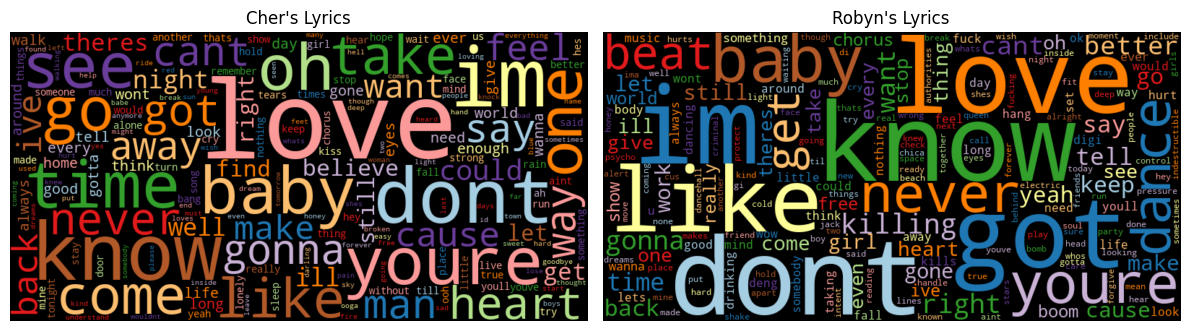

In [19]:
from matplotlib import pyplot as plt

def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    
    
def count_words(df, column='tokens', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)


# Generate word frequencies for Cher and Robyn
cher_word_freq = count_words(lyrics_data[lyrics_data['artist'] == 'cher'], column='tokens', min_freq=5)
robyn_word_freq = count_words(lyrics_data[lyrics_data['artist'] == 'robyn'], column='tokens', min_freq=5)

# Generate word clouds for Cher and Robyn
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
wordcloud(cher_word_freq['freq'], title="Cher's Lyrics")

plt.subplot(1, 2, 2)
wordcloud(robyn_word_freq['freq'], title="Robyn's Lyrics")

plt.tight_layout()
plt.show()


Q: What observations do you have about these (relatively straightforward) wordclouds? 

A: 
Cher's Lyrics Word Cloud:
- Dominant Words: Words like "love," "baby," "know," "don't," and "you're" are prominently featured, reflecting a strong focus on themes of love, relationships, and personal introspection.
- Emotional Expressions: Words such as "heart," "feel," "need," and "want" suggest a deep emotional expression in her lyrics, possibly depicting various stages of relationships and emotional states.

Robyn's Lyrics Word Cloud:
- Key Themes: Words like "love," "don't," "know," "heart," and "like" also dominate, showing that love and personal experiences are central themes in her lyrics as well.
- Dance and Movement: The presence of words like "dance," "beat," "gonna," and "back" might point towards more dynamic, rhythmic, and movement-oriented themes, aligning with Robyn's reputation for creating dance-pop music.